# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [89]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=501)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=501)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

267

In [90]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [91]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. On the Road to Next City...")

print("-----------------------------")
print("Data Retrieval Complete! Hope you enjoyed your trip!")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : riohacha
Processing Record 2 of Set 1 : nome
Processing Record 3 of Set 1 : xuddur
Processing Record 4 of Set 1 : sassandra
Processing Record 5 of Set 1 : plettenberg bay
Processing Record 6 of Set 1 : coihaique
City not found. On the Road to Next City...
Processing Record 7 of Set 1 : provideniya
Processing Record 8 of Set 1 : port alfred
Processing Record 9 of Set 1 : hofn
Processing Record 10 of Set 1 : bluff
Processing Record 11 of Set 1 : lavrentiya
Processing Record 12 of Set 1 : lebu
Processing Record 13 of Set 1 : qaanaaq
City not found. On the Road to Next City...
Processing Record 14 of Set 1 : punta arenas
Processing Record 15 of Set 1 : castro
Processing Record 16 of Set 1 : asau
Processing Record 17 of Set 1 : rikitea
Processing Record 18 of Set 1 : chongoyape
Processing Record 19 of Set 1 : tessalit
Processing Record 20 of Set 1 : boyolangu
Processing Record 21 of Set 1 : palmer
Process

Processing Record 25 of Set 4 : mnogovershinnyy
Processing Record 26 of Set 4 : wufeng
Processing Record 27 of Set 4 : diamantino
Processing Record 28 of Set 4 : mananjary
Processing Record 29 of Set 4 : tautira
City not found. On the Road to Next City...
Processing Record 30 of Set 4 : bredasdorp
Processing Record 31 of Set 4 : khandyga
Processing Record 32 of Set 4 : portland
Processing Record 33 of Set 4 : saquarema
Processing Record 34 of Set 4 : butembo
Processing Record 35 of Set 4 : sinnamary
City not found. On the Road to Next City...
Processing Record 36 of Set 4 : atuona
Processing Record 37 of Set 4 : ixtapa
Processing Record 38 of Set 4 : cam ranh
Processing Record 39 of Set 4 : nikolskoye
Processing Record 40 of Set 4 : yumen
Processing Record 41 of Set 4 : foumbot
Processing Record 42 of Set 4 : rawson
Processing Record 43 of Set 4 : athabasca
Processing Record 44 of Set 4 : nioro
Processing Record 45 of Set 4 : srednekolymsk
Processing Record 46 of Set 4 : alta floresta


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [92]:
weather_list = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [93]:
weather_list.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Riohacha,78,CO,1628442344,55,11.5444,-72.9072,89.35,12.86
1,Nome,90,US,1628442345,67,64.5011,-165.4064,53.67,18.41
2,Oddur,100,SO,1628442345,38,4.1213,43.8894,83.35,14.58
3,Sassandra,36,CI,1628442345,75,4.9500,-6.0833,79.20,11.27
4,Plettenberg Bay,72,ZA,1628441810,81,-34.0527,23.3716,57.54,4.18
5,Coyhaique,20,CL,1628441875,57,-45.5752,-72.0662,46.35,4.61
6,Provideniya,100,RU,1628442138,86,64.3833,-173.3000,44.46,14.09
7,Port Alfred,61,ZA,1628442197,59,-33.5906,26.8910,66.11,16.71
8,Hofn,42,IS,1628442191,73,64.2539,-15.2082,56.95,7.02
9,Bluff,64,NZ,1628442243,64,-46.6000,168.3333,35.80,15.77


In [94]:
weather_list.to_csv("Weather Output Data/cities_output.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 
No cities had 100% humidity

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

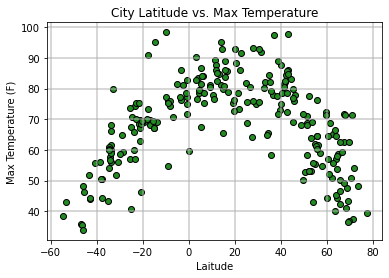

In [97]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_list["Lat"], weather_list["Max Temp"], facecolor = "forestgreen", edgecolor = "black")

# Set title and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")

# Format grid lines
plt.grid(linestyle='-', linewidth=2, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Results Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

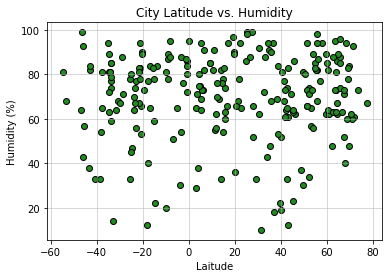

In [99]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_list["Lat"], weather_list["Humidity"], facecolor = "forestgreen", edgecolor = "black")

# Set title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")

# Format grid lines
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Results Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

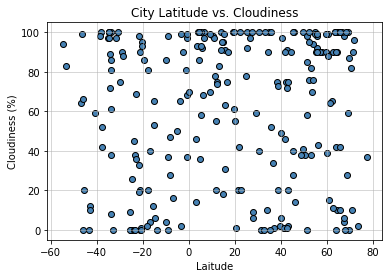

In [100]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_list["Lat"], weather_list["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Format grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Results Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

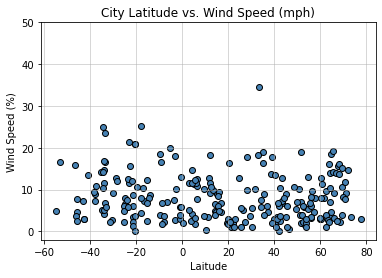

In [101]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_list["Lat"], weather_list["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set title and labels
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Format grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Results Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [ ]:
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [ ]:
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression